In [ ]:
from MoonBoardRNN.BetaMove.BetaMove import route_to_x_vectors
from MoonBoardRNN.GradeNet.grade_net import GradeNet
from MoonBoardRNN.BetaMove.BetaMove import classify_and_reorganize_data_ga
from MoonBoardRNN.BetaMove.BetaMove import x_vectors_to_matrix
from MoonBoardRNN.BetaMove.BetaMove import produce_sequence

In [ ]:
from share.moonboard_route import MoonBoardRoute
from MapElites.me_utils import *

rand_route = MoonBoardRoute.make_random_valid()
params = route_to_ME_params(rand_route)
deparasm = ME_params_to_route(params)
print(rand_route)
print(params)
print(deparasm)

In [ ]:
# make a route with a grade?
from share.moonboard_route import MoonBoardRoute
from MoonBoardRNN.GradeNet.grade_net import GradeNet
from MoonBoardRNN.plotting import plot_problem

TARGET = 'V4'
net = GradeNet()
while True:
    try:
        route = MoonBoardRoute.make_random_valid()
        grade = net.grade_route(route)
        if grade == TARGET:
            break
        else:
            print(f'Found route with grade {grade}')
    except Exception as ex:
        print(ex)
        pass

print(route.get_max_span(), route.get_hold_variety())
print(f'Grade: {grade}')
route.purge_holds()
plot_problem(route.to_strings())


V10
3.28125


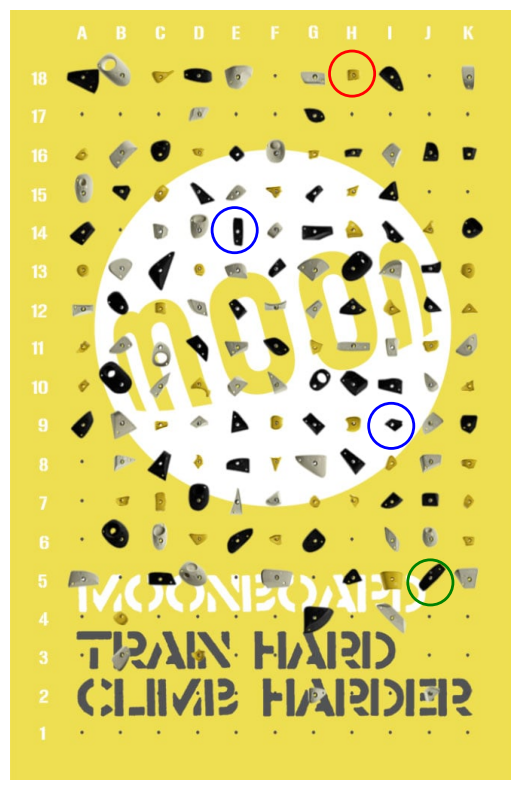

In [9]:

from share.moonboard_route import MoonBoardRoute
from MoonBoardRNN.GradeNet.grade_net import GradeNet
from MoonBoardRNN.plotting import plot_route

start_holds = ['J5']
end_holds = ['H18']
others = ['I9', 'E14']
route = MoonBoardRoute.from_hold_strings(start_holds=start_holds, mid_holds=others, end_holds=end_holds)
# x_vecs = route_to_x_vectors(route)
# matrix = x_vectors_to_matrix(x_vecs)

print('')
# x_vectors = route_to_x_vectors(route)
net = GradeNet()
grade = net.grade_route(route)
print(grade)
print(route.get_max_span())
plot_route(route)
#print(x_vectors)



In [ ]:
from util import load_pickle
from share.moonboard_route import MoonBoardRoute
from MapElites.me_utils import ME_params_to_route
from MoonBoardRNN.plotting import plot_route
archive_path = '/home/daniel/GeneticBoulders/results/1666711238.824114/archive.p'
archive = load_pickle(archive_path)
for e in archive:
    route = ME_params_to_route(list(e.sol))
    plot_route(route)



In [9]:
import os
from util import load_pickle
from MapElites.tracking import ExperimentAggregator
from MapElites.ribs_interface import plot_archive_heatmap
import matplotlib.pyplot as plt


grades = ['V4', 'V6', 'V8', 'V10', 'V12']
for grade in grades:
    path_base = '/home/daniel/Desktop/results_30_runs/results/'
    agg_path = os.path.join(path_base, grade, 'aggregator.p')
    img_base = os.path.join(path_base, 'graphs')
    os.makedirs(img_base, exist_ok=True)
    agg: ExperimentAggregator = load_pickle(agg_path)
    final_archive = agg.get_loggers()[-1].archives[-1]
    plot_archive_heatmap(final_archive, os.path.join(img_base, f'{grade}_archive.png'))
    plt.clf()
    # agg.plot_qd_score(os.path.join(img_base, f'{grade}_qd_score.png'))
    # agg.plot_grade_diffs(os.path.join(img_base, f'{grade}_grade_diff.png'))

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
print(os.getcwd())
from MapElites.ribs_interface import run_mapelites, MEParams
params = MEParams((3, 4), [(1, 4), (2, 6)], 5, 10, 100)
logger = run_mapelites(target_grade='V10', params=params, save_path='~/Desktop')

2023-03-07 15:05:45.679150: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 15:05:45.813575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 15:05:45.813594: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 15:05:45.837932: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-07 15:05:46.500433: W tensorflow/stream_executor/platform/de

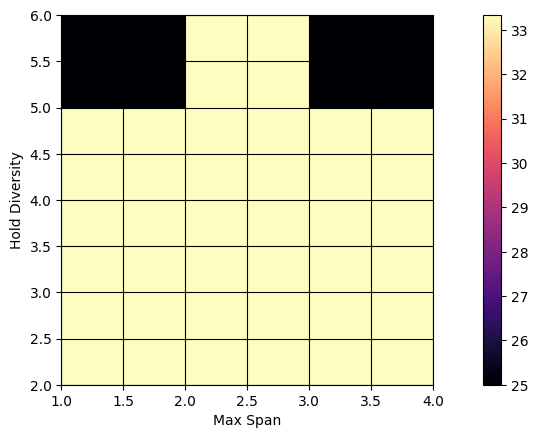

In [1]:
import matplotlib.pyplot as plt
from ribs.visualize import grid_archive_heatmap
from util import load_pickle
from MapElites.tracking import ExperimentAggregator
from MapElites.ribs_interface import viz_archive

agg: ExperimentAggregator = load_pickle('/home/daniel/Downloads/FinalResults30-20230307T092953Z-001/FinalResults30/V4/aggregator.p')
logger = agg.get_loggers()[1]
last_archive = logger.archives[-1]
viz_archive(last_archive, '')

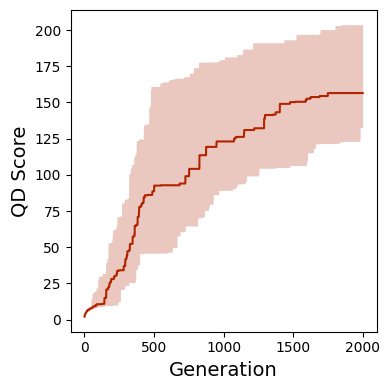

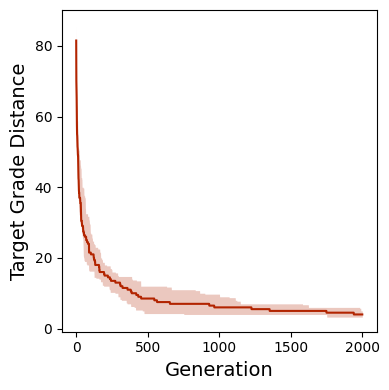

In [12]:
from util import load_pickle
from MapElites.me_utils import ME_params_to_route
from MoonBoardRNN.plotting import plot_route
from MapElites.tracking import ExperimentAggregator
path = lambda x: f'/home/daniel/Downloads/FinalResults30-20230307T092953Z-001/FinalResults30/{x}/aggregator.p'
agg: ExperimentAggregator = load_pickle(path('V12'))
agg.plot_qd_score('tmp.png', True)
agg.plot_grade_diffs('tmp.png', True)

In [ ]:
import pickle
from MapElites.me_utils import ME_params_to_route
from MoonBoardRNN.plotting import plot_route
from MoonBoardRNN.GradeNet import grade_net
from MapElites.tracking import ExperimentAggregator
agg_path = '/home/daniel/GeneticBoulders/results/V4/aggregator.p'
with open(agg_path, 'rb') as f:
    agg: ExperimentAggregator = pickle.load(f)
net = grade_net.GradeNet()
for logger in agg.get_loggers():
    archive = logger.archives[-1]
    for elite in archive:
        route = ME_params_to_route([int(i) for i in elite.sol])
        plot_route(route)

In [ ]:
from logger_plotter import plot_agg_routes
from util import load_pickle

grade = 'V4'
path = f'/home/tyebkhad/GeneticBoulders/results/{grade}/aggregator.p'
agg = load_pickle(path)
plot_agg_routes(agg, True)